In [3]:
import tensorflow as tf

print("Versión de tensorflow:{}".format(tf.__version__))
print("GPU:{}".format(tf.test.gpu_device_name()))

Versión de tensorflow:2.1.0
GPU:/device:GPU:0


In [5]:
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [8]:
class_names = ['Camiseta','Pantalón','Suéter','Vestido','Abrigo','Sandalia','Camisa','Zapatilla deportiva','Bolso','Botines']

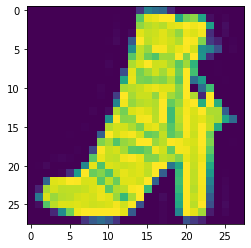

Botines
(28, 28)


In [14]:
plt.imshow(train_images[11])
plt.grid(False)
plt.show()
print(class_names[train_labels[11]])
print(train_images[11].shape)

In [15]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28,28)),
 keras.layers.Dense(150, activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer = 'adadelta',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(train_images,train_labels, batch_size=12, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 22s 363us/step - loss: 68.1259 - accuracy: 0.3265
Epoch 2/10
60000/60000 [==============================] - 19s 321us/step - loss: 29.9707 - accuracy: 0.5127
Epoch 3/10
60000/60000 [==============================] - 18s 298us/step - loss: 23.0067 - accuracy: 0.5731
Epoch 4/10
60000/60000 [==============================] - 18s 307us/step - loss: 19.3571 - accuracy: 0.6099
Epoch 5/10
60000/60000 [==============================] - 18s 303us/step - loss: 17.0729 - accuracy: 0.6341
Epoch 6/10
60000/60000 [==============================] - 18s 306us/step - loss: 15.5234 - accuracy: 0.6527
Epoch 7/10
60000/60000 [==============================] - 18s 306us/step - loss: 14.4018 - accuracy: 0.6653
Epoch 8/10
60000/60000 [==============================] - 19s 313us/step - loss: 13.5251 - accuracy: 0.6770
Epoch 9/10
60000/60000 [==============================] - 18s 300us/step - loss: 12.7943 - accuracy: 0.6866
Epoch 10/10
60000/60000 [===

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test:', test_acc)

10000/10000 [==============================] - 1s 99us/step
Test: 0.6916999816894531


Pantalón


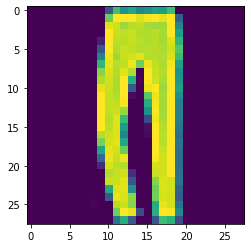

In [31]:
predictions = model.predict(test_images)
img_predict =predictions[2]
print(class_names[np.argmax(img_predict)])
plt.imshow(test_images[2])
plt.grid(False)
plt.show()